In [ ]:
import pandas as pd
#importing data
reviews = pd.read_csv('Womens-Clothing-E-Commerce-Reviews.csv')
reviews.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)

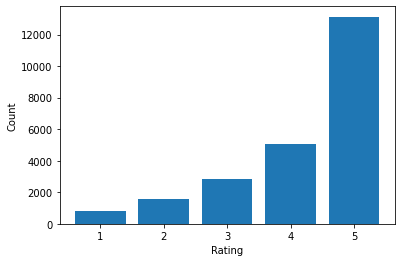

In [ ]:
#graph of review count
import numpy as np
labels, counts = np.unique(reviews['Rating'], return_counts=True)
figure = plt.bar(labels, counts)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# removinf reviews with 3 rating as they are neutral and adding the sentiment column based on the rating
better_reviews = reviews.dropna(subset=['Review Text'])
better_reviews = reviews[reviews['Rating'] != 3]
better_reviews['Sentiment'] = reviews['Rating'].apply(lambda rating : 1 if rating > 3 else -1)
better_reviews.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,1
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,1
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,-1


In [ ]:
#separating positive and negative review into different data frames
positive = better_reviews[better_reviews['Sentiment'] == 1]
negative = better_reviews[better_reviews['Sentiment'] == -1]

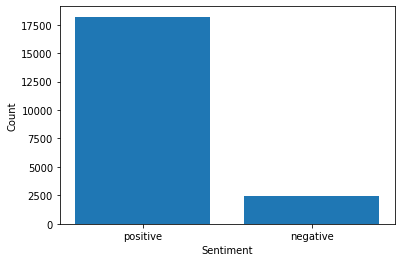

In [ ]:
#showing the different reviews
figure = plt.bar(['positive','negative'], [positive.shape[0], negative.shape[0]])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
#method to remove punctuation from the review text, taken from: https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final

In [ ]:
#removing punctionation from review text
better_reviews['Review Text'] = better_reviews['Review Text'] .astype(str)
better_reviews['Review Text'] = better_reviews['Review Text'].apply(remove_punctuation)
better_reviews = better_reviews.dropna(subset=['Review Text'])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
reviews_sentiments = better_reviews[['Review Text','Sentiment']]
reviews_sentiments.head()

,Review Text,Sentiment
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress it's sooo pretty i happened ...,1
3,"I love, love, love this jumpsuit it's fun, fli...",1
4,This shirt is very flattering to all due to th...,1
5,"I love tracy reese dresses, but this one is no...",-1


In [ ]:
#creating training and testing set
index = reviews_sentiments.index
reviews_sentiments['random_number'] = np.random.randn(len(index))
train = reviews_sentiments[reviews_sentiments['random_number'] <= 0.8]
test = reviews_sentiments[reviews_sentiments['random_number'] > 0.8]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
reviews_sentiments.head()

,Review Text,Sentiment,random_number
0,Absolutely wonderful - silky and sexy and comf...,1,-1.209247
1,Love this dress it's sooo pretty i happened ...,1,1.029795
3,"I love, love, love this jumpsuit it's fun, fli...",1,-0.546006
4,This shirt is very flattering to all due to th...,1,-0.536073
5,"I love tracy reese dresses, but this one is no...",-1,0.333348


In [ ]:
# count vectorizer from Scikit learn:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Review Text'])
test_matrix = vectorizer.transform(test['Review Text'])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
X_train = train_matrix
X_test = test_matrix
y_train = train['Sentiment']
y_test = test['Sentiment']

In [ ]:
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.63      0.75      0.69       448
           1       0.97      0.95      0.96      3997

    accuracy                           0.93      4445
   macro avg       0.80      0.85      0.82      4445
weighted avg       0.94      0.93      0.93      4445

